<a href="https://colab.research.google.com/github/ohabardi/udacity-blog-hhcahps/blob/main/HHCAHPS_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load and Explore the Data

In [2]:
import pandas as pd
from google.colab import files

# Prompt the user to upload the file
uploaded = files.upload()

# Automatically read the uploaded file
import io
df = pd.read_csv(io.BytesIO(uploaded['HHCAHPS_Provider_Apr2025.csv']))


Saving HHCAHPS_Provider_Apr2025.csv to HHCAHPS_Provider_Apr2025.csv


# Preview the dataset

In [3]:
df.head()

,CMS Certification Number (CCN),HHCAHPS Survey Summary Star Rating,HHCAHPS Survey Summary Star Rating Footnote,Star Rating for health team gave care in a professional way,Footnote for Star Rating for gave care in a professional way,Percent of patients who reported that their home health team gave care in a professional way,Footnote for Percent of patients who reported that their home health team gave care in a professional way,Star Rating for health team communicated well with them,Footnote for Star Rating for communicated well with them,Percent of patients who reported that their home health team communicated well with them,...,Footnote for Star Rating for overall care from agency,Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),Footnote for Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0(lowest) to 10(highest),"Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family","Footnote for Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family",Number of completed Surveys,Footnote for number of completed surveys,Survey response rate,Footnote for Survey response rate,Footnote Number
0,17000,5,NaN,4,NaN,92,NaN,5,NaN,90,...,NaN,91,NaN,84,NaN,665,NaN,19,NaN,NaN
1,17009,4,NaN,4,NaN,91,NaN,4,NaN,86,...,NaN,90,NaN,84,NaN,292,NaN,32,NaN,NaN
2,17013,5,NaN,4,NaN,92,NaN,5,NaN,93,...,NaN,90,NaN,84,NaN,203,NaN,31,NaN,NaN
3,17014,5,NaN,4,NaN,92,NaN,5,NaN,89,...,NaN,89,NaN,86,NaN,148,NaN,28,NaN,NaN
4,17016,4,NaN,3,NaN,89,NaN,4,NaN,88,...,NaN,85,NaN,78,NaN,152,NaN,26,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12068 entries, 0 to 12067
Data columns (total 26 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                           --------------  ----- 
 0   CMS Certification Number (CCN)                                                                                                   12068 non-null  int64 
 1   HHCAHPS Survey Summary Star Rating                                                                                               12068 non-null  object
 2   HHCAHPS Survey Summary Star Rating Footnote                                                                                      8279 non-null   object
 3   Star Rating for health team gave care in a professional way                                          

In [5]:
df.describe(include='all')


,CMS Certification Number (CCN),HHCAHPS Survey Summary Star Rating,HHCAHPS Survey Summary Star Rating Footnote,Star Rating for health team gave care in a professional way,Footnote for Star Rating for gave care in a professional way,Percent of patients who reported that their home health team gave care in a professional way,Footnote for Percent of patients who reported that their home health team gave care in a professional way,Star Rating for health team communicated well with them,Footnote for Star Rating for communicated well with them,Percent of patients who reported that their home health team communicated well with them,...,Footnote for Star Rating for overall care from agency,Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),Footnote for Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0(lowest) to 10(highest),"Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family","Footnote for Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family",Number of completed Surveys,Footnote for number of completed surveys,Survey response rate,Footnote for Survey response rate,Footnote Number
count,12068.000000,12068,8279,12068,8279,12068,8279,12068,8279,12068,...,8279,12068,8279,12068,8279,12068,8279,12068,8279,8279
unique,NaN,6,6,6,6,59,6,6,6,64,...,6,80,6,93,6,640,6,69,6,6
top,NaN,Not Available,12,Not Available,12,Not Available,12,Not Available,12,Not Available,...,12,Not Available,12,Not Available,12,Not Available,12,Not Available,12,12
freq,NaN,7383,4999,7383,4999,4999,4999,7383,4999,4999,...,4999,4999,4999,4999,4999,4999,4999,4999,4999,4999
mean,374991.650729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,241593.318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,17000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,148076.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,368327.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,559497.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Clean the Data

In [6]:
df_cleaned = df.drop(columns=[col for col in df.columns if 'Footnote' in col])

# Convert numeric columns from strings to proper numbers

In [7]:
cols_to_convert = [
    col for col in df_cleaned.columns
    if 'Percent' in col or 'Star Rating' in col or 'Survey response rate' in col or 'Number of completed Surveys' in col
]

for col in cols_to_convert:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12068 entries, 0 to 12067
Data columns (total 13 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   CMS Certification Number (CCN)                                                                                        12068 non-null  int64  
 1   HHCAHPS Survey Summary Star Rating                                                                                    4685 non-null   float64
 2   Star Rating for health team gave care in a professional way                                                           4685 non-null   float64
 3   Percent of patients who reported that their home health team gave care in a professional way                          7069 non-null   float64
 4   Star

In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12068 entries, 0 to 12067
Data columns (total 13 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   CMS Certification Number (CCN)                                                                                        12068 non-null  int64  
 1   HHCAHPS Survey Summary Star Rating                                                                                    4685 non-null   float64
 2   Star Rating for health team gave care in a professional way                                                           4685 non-null   float64
 3   Percent of patients who reported that their home health team gave care in a professional way                          7069 non-null   float64
 4   Star

# Explore & Answer the 3 Questions

Q1) What factors are most strongly correlated with patients recommending a home health agency?

In [9]:
# Create a new DataFrame with just the columns we care about
df_corr = df_cleaned[[
    'Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family',
    'Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)',
    'Percent of patients who reported that their home health team gave care in a professional way',
    'Percent of patients who reported that their home health team communicated well with them',
    'Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them',
    'Survey response rate',
    'Number of completed Surveys'
]].dropna()


In [10]:
# show the resault using a heatmap that shows the Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap="Blues")
plt.title("Correlation with Patient Recommendation (%)")
plt.tight_layout()  # <-- Add this line
plt.show()


NameError: name 'plt' is not defined

Q2) Does the number of completed surveys or response rate affect overall patient rating or communication rating?

Prepare Data Subset

In [11]:
q2_df = df_cleaned[[
    'Number of completed Surveys',
    'Survey response rate',
    'Star Rating for how patients rated overall care from agency',
    'Percent of patients who reported that their home health team communicated well with them'
]].dropna()


Plot Relationships
1. Survey Count vs Overall Star Rating

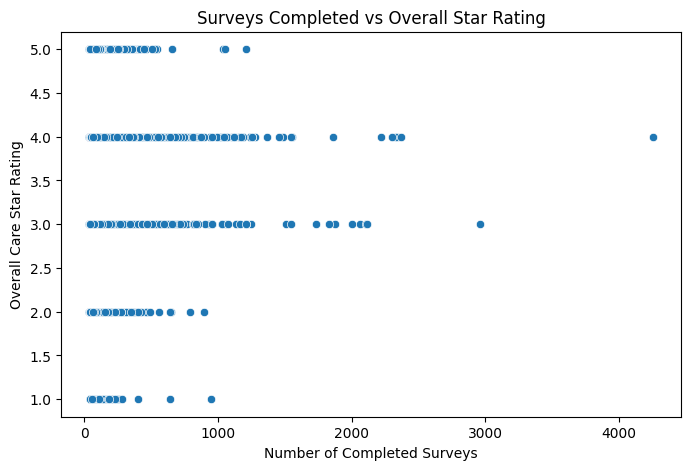

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(data=q2_df, x='Number of completed Surveys',
                y='Star Rating for how patients rated overall care from agency')
plt.title('Surveys Completed vs Overall Star Rating')
plt.xlabel('Number of Completed Surveys')
plt.ylabel('Overall Care Star Rating')
plt.show()


2. Survey Response Rate vs Communication

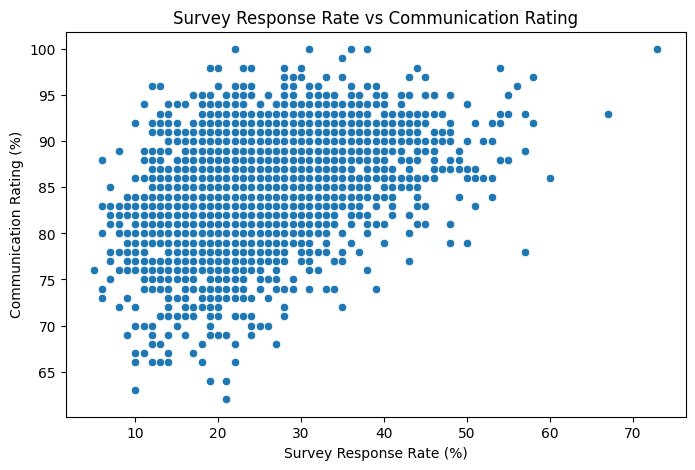

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=q2_df, x='Survey response rate',
                y='Percent of patients who reported that their home health team communicated well with them')
plt.title('Survey Response Rate vs Communication Rating')
plt.xlabel('Survey Response Rate (%)')
plt.ylabel('Communication Rating (%)')
plt.show()


# Correlation Check

In [14]:
q2_df.corr()

,Number of completed Surveys,Survey response rate,Star Rating for how patients rated overall care from agency,Percent of patients who reported that their home health team communicated well with them
Number of completed Surveys,1.000000,0.058510,0.027852,0.037976
Survey response rate,0.058510,1.000000,0.383009,0.404538
Star Rating for how patients rated overall care from agency,0.027852,0.383009,1.000000,0.755431
Percent of patients who reported that their home health team communicated well with them,0.037976,0.404538,0.755431,1.000000


Q3) Which service area scores the highest across agencies: professional care, communication, or safety discussions?

Prepare Data Subset

In [15]:
q3_df = df_cleaned[[
    'Percent of patients who reported that their home health team gave care in a professional way',
    'Percent of patients who reported that their home health team communicated well with them',
    'Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them'
]].dropna()


Calculate Averages

In [16]:
# Calculate mean values for each category
q3_averages = q3_df.mean().sort_values(ascending=False)
q3_averages


,0
Percent of patients who reported that their home health team gave care in a professional way,88.848635
Percent of patients who reported that their home health team communicated well with them,85.951761
"Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them",82.247560


Visualize the Averages

<ipython-input-17-bca1a36a87cb>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


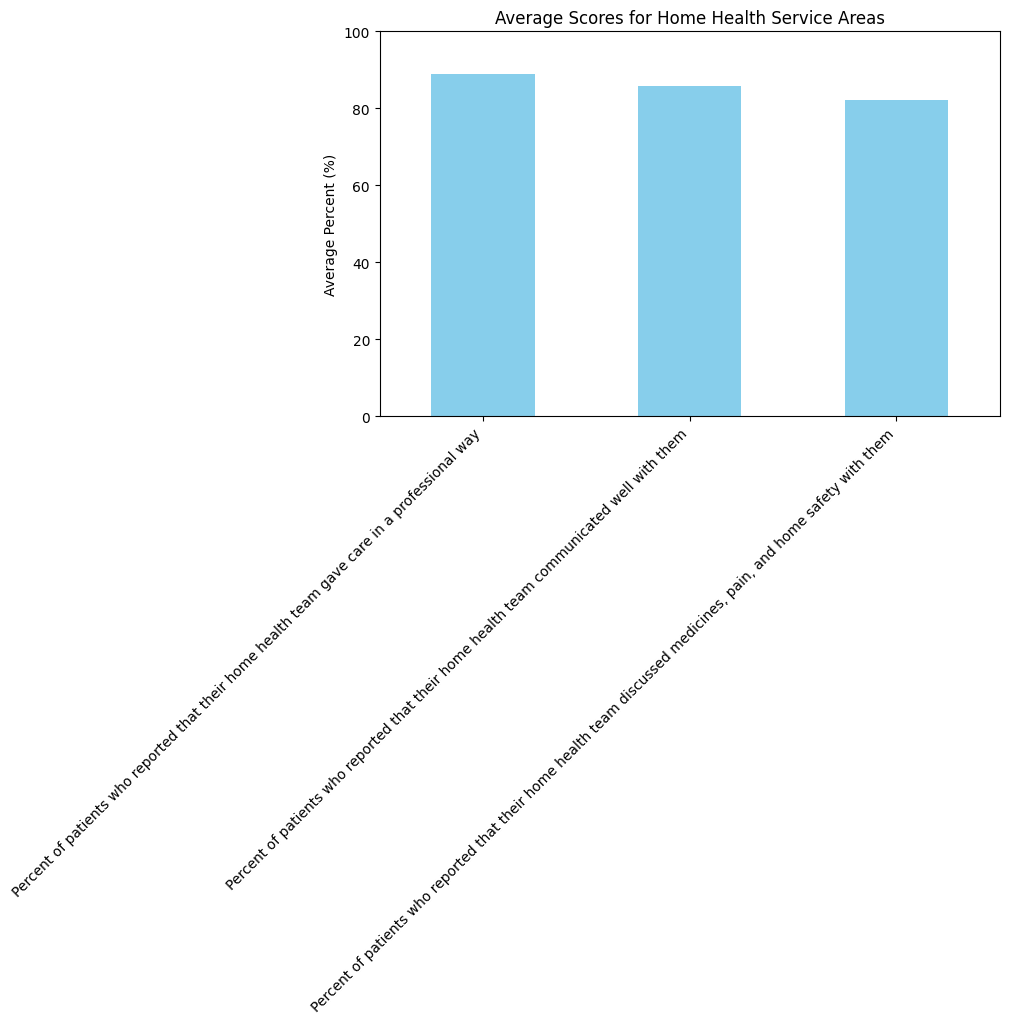

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
q3_averages.plot(kind='bar', color='skyblue')
plt.title('Average Scores for Home Health Service Areas')
plt.ylabel('Average Percent (%)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


Q4: Can we predict whether patients would recommend a home health agency?

 Predicting Patient Recommendation (Classification)

In [18]:
# Create binary target: 1 if recommendation >= 90%, else 0
df_model = df_cleaned.copy()
df_model = df_model.dropna(subset=[
    'Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family'
])
df_model['Recommend_Binary'] = df_model[
    'Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family'
].apply(lambda x: 1 if x >= 90 else 0)

# Select features
feature_cols = [col for col in df_model.columns if (
    'Percent' in col or 'Star Rating' in col or 'Survey response rate' in col or 'Number of completed Surveys' in col
) and 'recommend' not in col.lower()]
X = df_model[feature_cols].dropna()
y = df_model.loc[X.index, 'Recommend_Binary']


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [21]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[862  12]
 [ 38  25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       874
           1       0.68      0.40      0.50        63

    accuracy                           0.95       937
   macro avg       0.82      0.69      0.74       937
weighted avg       0.94      0.95      0.94       937



<Axes: title={'center': 'Feature Importance'}>

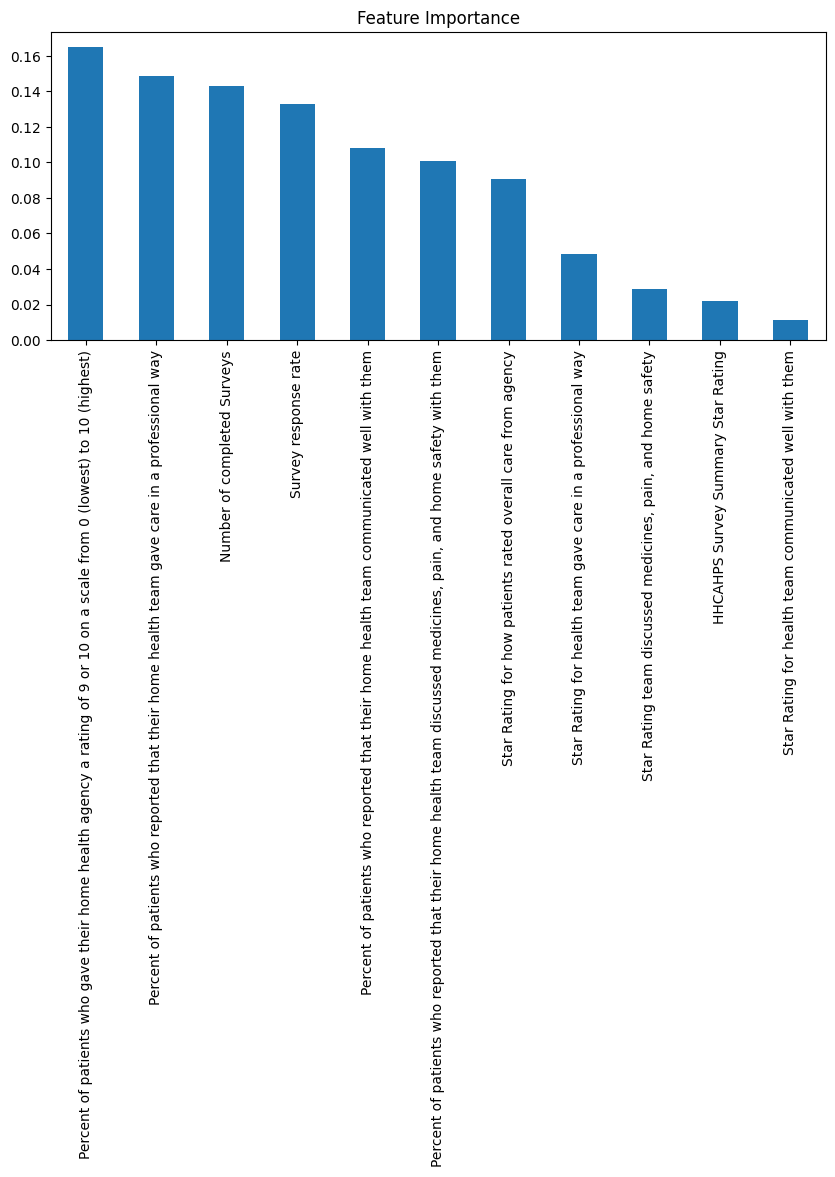

In [22]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 4), title="Feature Importance")


Which Features Matter Most?

This bar chart shows the relative importance of each feature in predicting whether patients would recommend their home health agency.

    Top predictors include:

        % who gave a rating of 9 or 10: strong signal of satisfaction

        % reporting professional care: reflects trust and reliability

        Number of completed surveys: higher engagement may indicate better-managed agencies

        Survey response rate: agencies with more responsive patients tend to score higher

    Lower importance was found in:

        HHCAHPS Summary Star Rating: possibly due to overlap with other more detailed metrics

        Star Rating for communication: possibly captured more effectively by direct % communication scores

   This analysis helps identify which service metrics to prioritize when aiming to improve patient satisfaction and recommendations.

**Q5: Can We Segment Agencies Based on Performance?**

Segmenting Agencies by Performance (Clustering)

In [25]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cluster_features = df_cleaned[feature_cols].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)


In [26]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
df_cleaned_clustered = cluster_features.copy()
df_cleaned_clustered['Cluster'] = clusters


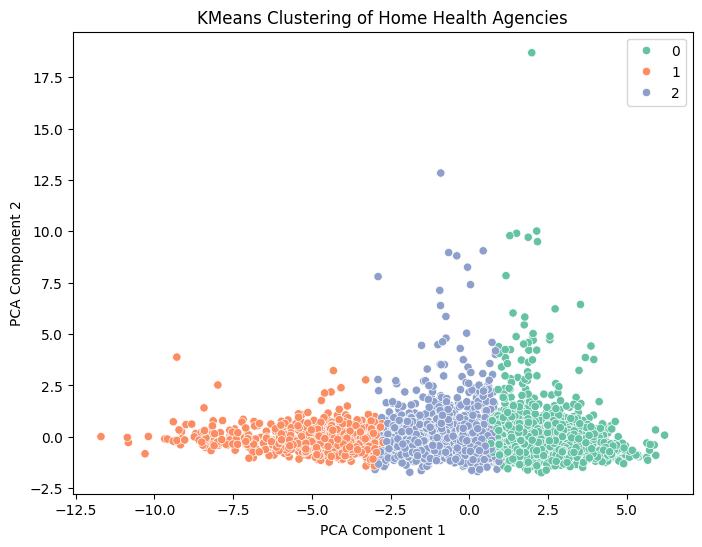

In [27]:
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=clusters, palette='Set2')
plt.title("KMeans Clustering of Home Health Agencies")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


Result:

    The scatter plot above shows how agencies are grouped into three distinct clusters based on PCA components.

    Each dot represents a home health agency.

    Clusters appear to represent:

        Cluster 0: Likely low-performing agencies.

        Cluster 1: Moderate or average performers.

        Cluster 2: High-performing agencies across multiple satisfaction metrics.


    This clustering helps stakeholders identify which agencies need support, which are doing well, and how patterns in survey metrics group agencies by real-world performance.